In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

""" O objetivo desse projeto é demonstrar habilidades em dados que desenvolvi, dando destaque para: Limpeza de dados,
manipulacao de dados, análise exploratória, gráficos por Python/Power BI, regressão linear e Machine Learning para prever valores."""

""" 1 - Limpeza e traducao dos dados para melhor leitura """
""" 
Area Code: Código da Loja;
State: Estado da Loja;
Market: Região da Loja;
Market Size: Tamanho da Loja;
Profit: Lucros em Dólares ($);
Margin: Lucro + Despesas Totais ($) OU Vendas - CPV ($);
Sales: Valores Adquiridos em Vendas ($);
COGS: Custo dos Produtos Vendidos ($);
Total Expenses: Despesas totais para colocar o produto à venda ($);
Marketing: Despesas com Marketing ($);
Inventory: Valor do Estoque do Produto no Momento da Venda ($);
Budget Profit: Lucro Esperado ($);
Budget COGS: CPV esperado ($);
Budget Margin: Lucro Esperado + Despesas Totais Esperadas ($) OU Vendas Esperadas - CPV Esperado ($);
Budget Sales: Valor Esperado Adquirido em Vendas ($);
ProductID: ID do produto;
Date: Data de venda;
Product Type: Categoria de Produto;
Product: Descrição do produto;
Type: Tipo; """
                                        
data = pd.read_csv("C:/Users/marce/Downloads/datasettt/sales.csv")

dataPT1 = data.replace(["East", "West", "South", "Central", "Caffe Latte", "Caffe Mocha","Chamomile", "Darjeeling", "Decaf Espresso",
                    "Decaf Irish Cream", "Earl Grey","Green Tea", "Lemon", "Mint", "Regular Espresso", "Coffee", "Espresso","Herbal Tea", "Tea",
                     "Small Market", "Major Market","Decaf", "Regular" ,  ], 
                    ["Leste", "Oeste", "Sul","Centro", "Café Latte", "Café mocha", "Camomila", "Folha de Darjeeling", "Café Decaf Espresso",
                    "Creme Irlandês descafeinado",  "Chá de conde cinza", "Chá verde","Limão", "Hortelã", "Café espresso", "Café", "Café espresso",
                     "Chá de ervas", "Chá ", "Pequeno", "Grande","Descafeinado", "Normal",  ])
                    
dataPT2 = dataPT1.rename(columns= {"Area Code" : "Código da área" , "State" : "Estado" , "Market" : "Localidade" , "Market Size" : "Tamanho do mercado"
                    , "Profit" : "Lucros($)" , "Sales" : "Vendas", "COGS" : "Custo dos produtos vendidos", "Total Expenses" : "Despesas totais", 
                    "Inventory": "Valor do estoque" , "Budget Profit" : "Lucro esperado", "Budget COGS" : "CPV esperado", "Budget Sales":
                    "Venda esperada", "ProductId" : "ID do produto", "Date": "Data", "Product Type": "Tipo do produto" , "Product":"Produto",
                    "Type" : "Tipo", "Marketing" : "Investimento em Marketing", "Margin" : "Despesas + lucros" , 
                    "Budget Margin" : "Despesa + lucro esperado" })

#Conjunto de dados original
data.head(10)

,Area Code,State,Market,Market Size,Profit,Margin,Sales,COGS,Total Expenses,Marketing,Inventory,Budget Profit,Budget COGS,Budget Margin,Budget Sales,ProductId,Date,Product Type,Product,Type
0,203,Connecticut,East,Small Market,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Coffee,Columbian,Regular
1,203,Connecticut,East,Small Market,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Coffee,Columbian,Regular
2,203,Connecticut,East,Small Market,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Coffee,Columbian,Regular
3,203,Connecticut,East,Small Market,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Coffee,Columbian,Regular
4,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Coffee,Columbian,Regular
5,203,Connecticut,East,Small Market,104.0,135.0,223.0,90.0,56.0,29.0,1139.0,90.0,80.0,130.0,210.0,2,08/01/11 00:00:00,Coffee,Columbian,Regular
6,203,Connecticut,East,Small Market,135.0,155.0,275.0,103.0,64.0,33.0,1130.0,110.0,90.0,150.0,240.0,2,09/01/11 00:00:00,Coffee,Columbian,Regular
7,203,Connecticut,East,Small Market,171.0,188.0,334.0,125.0,73.0,41.0,1119.0,130.0,100.0,160.0,260.0,2,10/01/11 00:00:00,Coffee,Columbian,Regular
8,203,Connecticut,East,Small Market,181.0,195.0,346.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/11 00:00:00,Coffee,Columbian,Regular
9,203,Connecticut,East,Small Market,15.0,31.0,51.0,20.0,16.0,5.0,804.0,20.0,20.0,30.0,50.0,13,06/01/10 00:00:00,Tea,Green Tea,Regular


In [208]:
#Conjunto de dados limpos
dataPT2.head(10)

,Código da área,Estado,Localidade,Tamanho do mercado,Lucros($),Despesas + lucros,Vendas,Custo dos produtos vendidos,Despesas totais,Investimento em Marketing,Valor do estoque,Lucro esperado,CPV esperado,Despesa + lucro esperado,Venda esperada,ID do produto,Data,Tipo do produto,Produto,Tipo
0,203,Connecticut,Leste,Pequeno,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,04/01/10 00:00:00,Café,Columbian,Normal
1,203,Connecticut,Leste,Pequeno,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/10 00:00:00,Café,Columbian,Normal
2,203,Connecticut,Leste,Pequeno,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/10 00:00:00,Café,Columbian,Normal
3,203,Connecticut,Leste,Pequeno,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,12/01/10 00:00:00,Café,Columbian,Normal
4,203,Connecticut,Leste,Pequeno,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,07/01/11 00:00:00,Café,Columbian,Normal
5,203,Connecticut,Leste,Pequeno,104.0,135.0,223.0,90.0,56.0,29.0,1139.0,90.0,80.0,130.0,210.0,2,08/01/11 00:00:00,Café,Columbian,Normal
6,203,Connecticut,Leste,Pequeno,135.0,155.0,275.0,103.0,64.0,33.0,1130.0,110.0,90.0,150.0,240.0,2,09/01/11 00:00:00,Café,Columbian,Normal
7,203,Connecticut,Leste,Pequeno,171.0,188.0,334.0,125.0,73.0,41.0,1119.0,130.0,100.0,160.0,260.0,2,10/01/11 00:00:00,Café,Columbian,Normal
8,203,Connecticut,Leste,Pequeno,181.0,195.0,346.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,11/01/11 00:00:00,Café,Columbian,Normal
9,203,Connecticut,Leste,Pequeno,15.0,31.0,51.0,20.0,16.0,5.0,804.0,20.0,20.0,30.0,50.0,13,06/01/10 00:00:00,Chá,Chá verde,Normal


In [209]:
dataPT2.isnull().sum() #Sem valores nulos e duplicados (já verificado)

Código da área                 0
Estado                         0
Localidade                     0
Tamanho do mercado             0
Lucros($)                      0
Despesas + lucros              0
Vendas                         0
Custo dos produtos vendidos    0
Despesas totais                0
Investimento em Marketing      0
Valor do estoque               0
Lucro esperado                 0
CPV esperado                   0
Despesa + lucro esperado       0
Venda esperada                 0
ID do produto                  0
Data                           0
Tipo do produto                0
Produto                        0
Tipo                           0
dtype: int64

In [210]:
dataPT2["Data"] = pd.to_datetime(dataPT2["Data"], format= "mixed", dayfirst = True) #Organizando datas

dataPT2.head()


,Código da área,Estado,Localidade,Tamanho do mercado,Lucros($),Despesas + lucros,Vendas,Custo dos produtos vendidos,Despesas totais,Investimento em Marketing,Valor do estoque,Lucro esperado,CPV esperado,Despesa + lucro esperado,Venda esperada,ID do produto,Data,Tipo do produto,Produto,Tipo
0,203,Connecticut,Leste,Pequeno,107.0,176.0,292.0,116.0,69.0,38.0,962.0,110.0,110.0,160.0,270.0,2,2010-01-04,Café,Columbian,Normal
1,203,Connecticut,Leste,Pequeno,75.0,135.0,225.0,90.0,60.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2010-01-07,Café,Columbian,Normal
2,203,Connecticut,Leste,Pequeno,122.0,195.0,325.0,130.0,73.0,42.0,1134.0,130.0,110.0,180.0,290.0,2,2010-01-11,Café,Columbian,Normal
3,203,Connecticut,Leste,Pequeno,105.0,174.0,289.0,115.0,69.0,37.0,1166.0,110.0,100.0,160.0,260.0,2,2010-01-12,Café,Columbian,Normal
4,203,Connecticut,Leste,Pequeno,104.0,135.0,223.0,90.0,56.0,29.0,1148.0,90.0,80.0,130.0,210.0,2,2011-01-07,Café,Columbian,Normal


<Axes: >

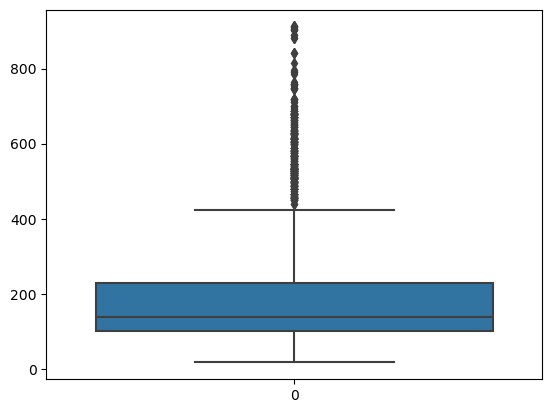

In [211]:
""" Observando o boxplot de vendas, lucros e investimento em marketing, percebe-se que há muitos outliers acima ou abaixo da média, 
o que pode se tornar um problema, pois queremos que o nosso ML seja o mais acertivo possível. Portanto, irei remover eles. """

sns.boxplot(dataPT2["Vendas"])



<Axes: >

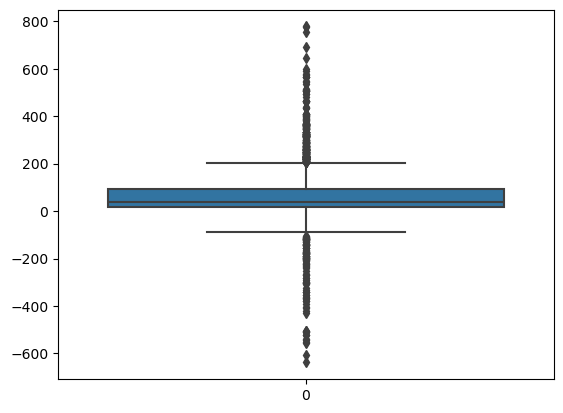

In [212]:
sns.boxplot(dataPT2["Lucros($)"])

<Axes: >

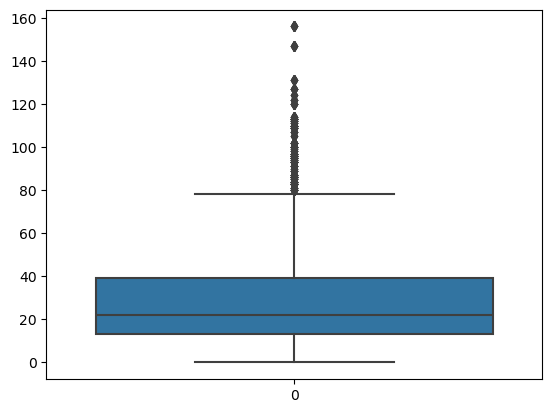

In [213]:
sns.boxplot(dataPT2["Investimento em Marketing"])

<Axes: >

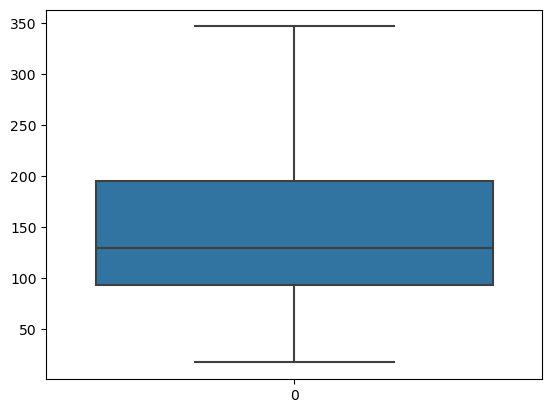

In [214]:
# Boxplot limpos:

new_data = (dataPT2["Vendas"]<=350)

dataPT2 = dataPT2[new_data]

sns.boxplot(dataPT2["Vendas"])


<Axes: >

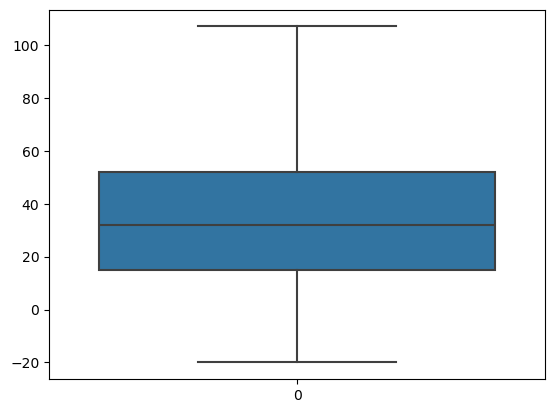

In [215]:
new_data2 = (dataPT2["Lucros($)"]<=107) & (dataPT2["Lucros($)"]>= -20) #Limpando os números positivos/negativos


dataPT2 = dataPT2[new_data2]

sns.boxplot(dataPT2["Lucros($)"])





<Axes: >

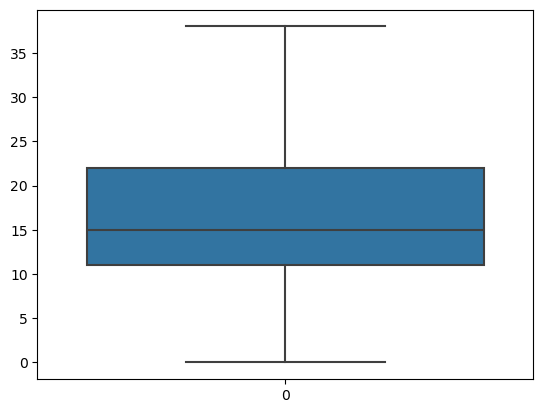

In [216]:
new_data3 = (dataPT2["Investimento em Marketing"]<= 38)

dataPT2 = dataPT2[new_data3]

sns.boxplot(dataPT2["Investimento em Marketing"])

In [217]:
#Mantendo colunas que daremos mais atencao de como elas se relacionam

data_num = dataPT2.select_dtypes(exclude= ["object" , "datetime64"]) #Transformando apenas em colunas com números


data_num = data_num[['Lucros($)', 'Vendas',
       'Investimento em Marketing',]]

datacorr = data_num.corr() #Vendo a relacao das informacoes

datacorr

,Lucros($),Vendas,Investimento em Marketing
Lucros($),1.000000,0.801921,0.539543
Vendas,0.801921,1.000000,0.908682
Investimento em Marketing,0.539543,0.908682,1.000000


<Axes: >

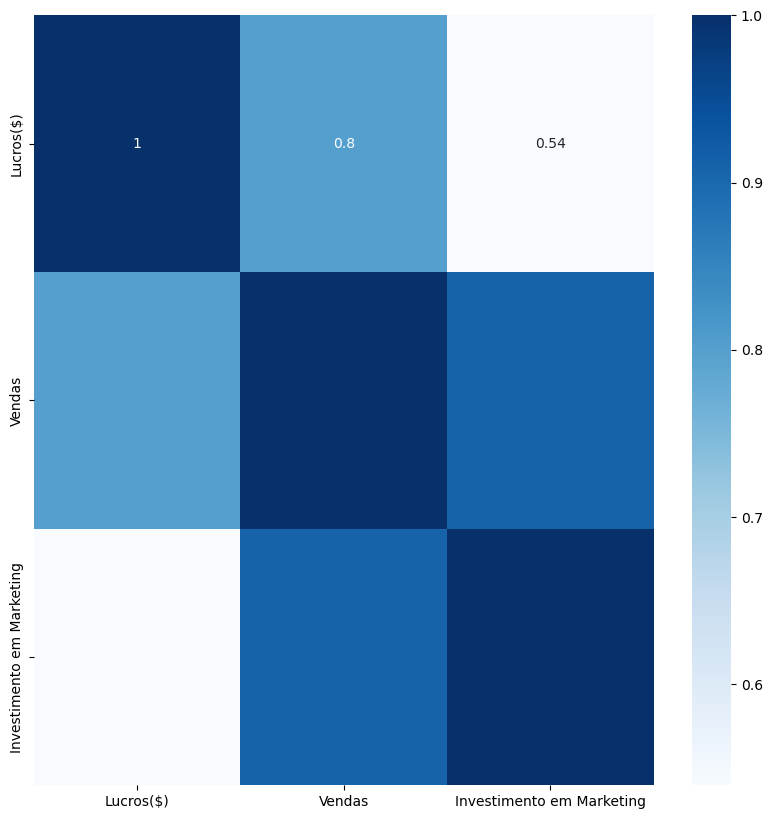

In [218]:
""" Vendo a relacao das informacoes por meio do heatmap, há uma taxa muito alta em vendas com investimento
no MKT."""

plt.figure(figsize=(10,10))
sns.heatmap(data_num.corr() , cmap= "Blues" , annot= True)

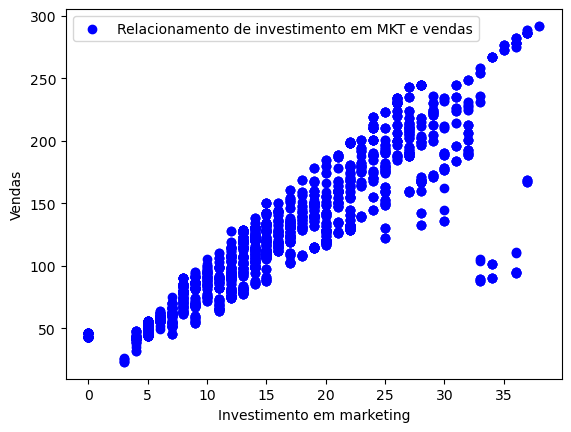

In [219]:
""" Agora o principal objetivo é que o Machine Learning nos responda quanto o número x em 
investimento de marketing pode nos gerar de vendas, com base nos dados históricos """

x = np.array(dataPT2["Investimento em Marketing"])

x = x.reshape(-1, 1)
y = dataPT2["Vendas"]

#Gráfico de dispersao

plt.scatter(x, y , color= "Blue" , label = "Relacionamento de investimento em MKT e vendas")
plt.xlabel("Investimento em marketing")
plt.ylabel("Vendas")
plt.legend()
plt.show()

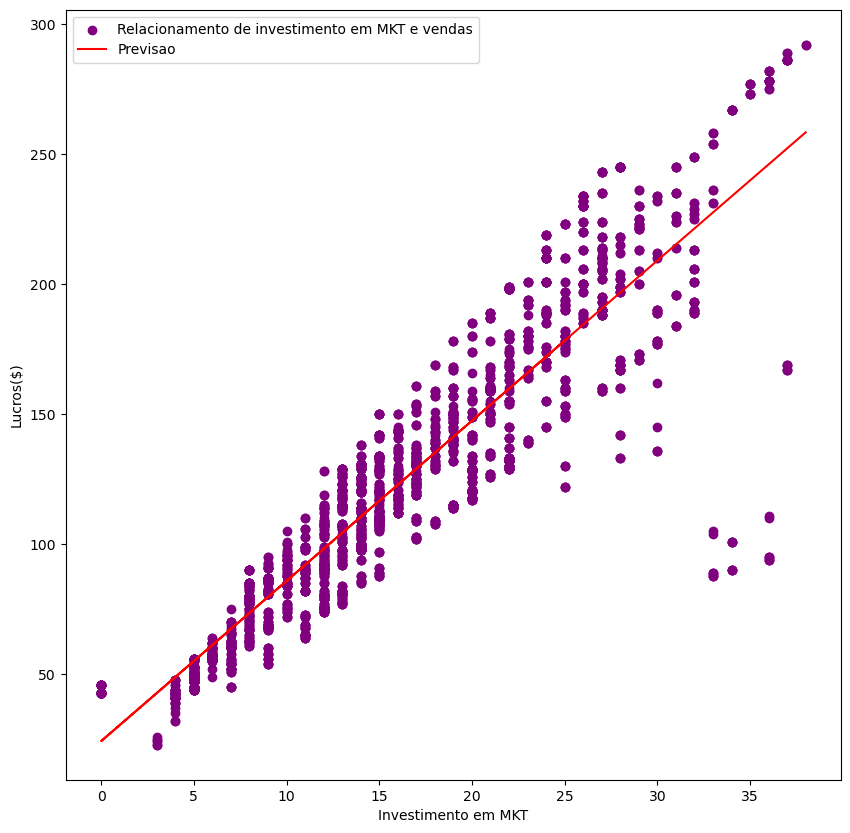

In [220]:
""" A linha da regressao linear nos mostra que o desfecho dessas duas é positivo! """

xtreino, xteste, ytreino, yteste = train_test_split(x, y ,test_size= 0.3, random_state= 42)

modelo_regre = LinearRegression()

modelo_regre.fit(xtreino, ytreino)


plt.figure(figsize= (10,10))
plt.scatter(x,y, color= "Purple" , label= "Relacionamento de investimento em MKT e vendas")
plt.plot(x, modelo_regre.predict(x), color= "Red", label="Previsao")
plt.xlabel("Investimento em MKT")
plt.ylabel("Lucros($)")
plt.legend()
plt.show()

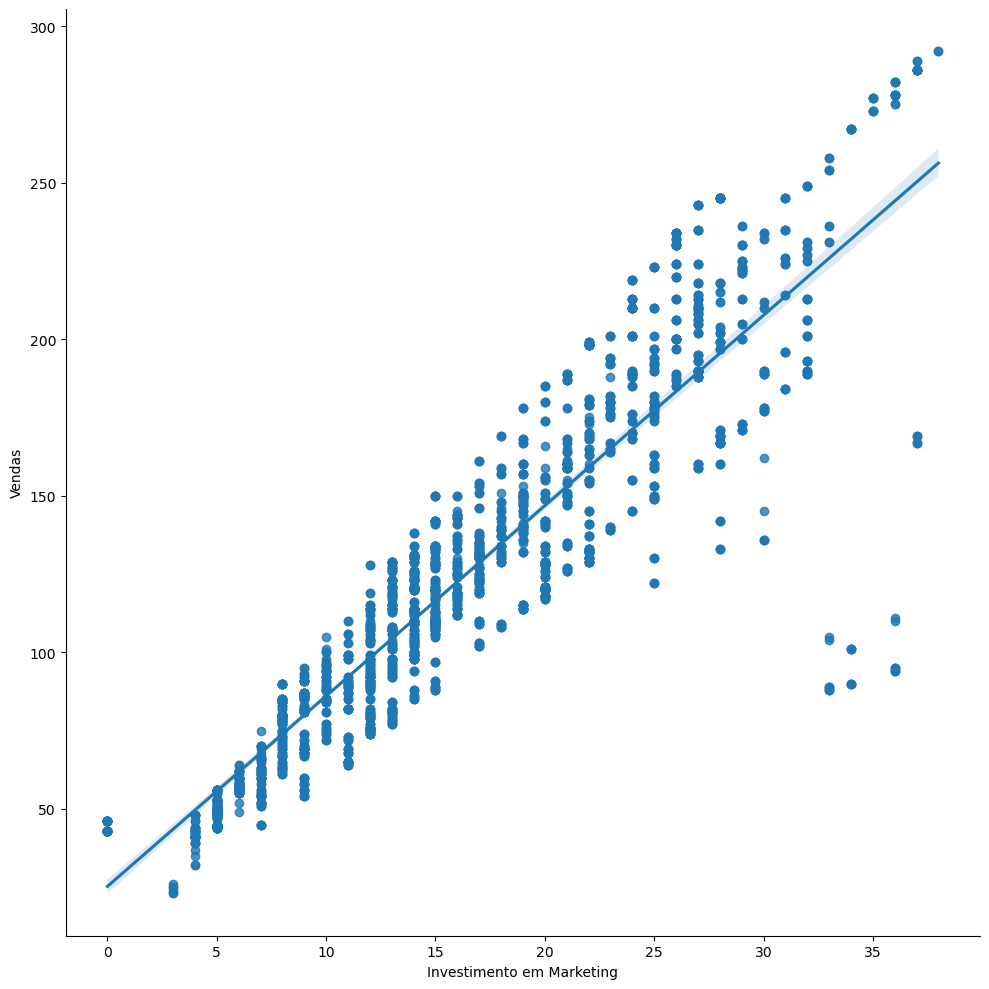

In [221]:
#Utilizando o seaborn

sns.lmplot(x= "Investimento em Marketing", y = "Vendas" , data= dataPT2, height = 10)


In [222]:
#Modelo de Machine Learning

investimento_mkt = np.array([[79]]) #Valor aleatório (79)
vendas = modelo_regre.predict(investimento_mkt)

print("Se você investir:", investimento_mkt ,"em Marketing" , ", Você terá:", vendas , "de vendas.")

Se você investir: [[79]] em Marketing , Você terá: [510.72783769] de vendas.


In [223]:
# Mais exemplos:

investimento_mkt = np.array([[12]]) 
vendas = modelo_regre.predict(investimento_mkt)

print("Se você investir:", investimento_mkt ,"em Marketing" ,  ", Você terá:", vendas , "de vendas.")

Se você investir: [[12]] em Marketing , Você terá: [98.25498674] de vendas.


In [224]:
investimento_mkt = np.array([[37]]) 
vendas = modelo_regre.predict(investimento_mkt)

print("Se você investir:", investimento_mkt ,"em Marketing" ,  ", Você terá:", vendas , "de vendas.")

Se você investir: [[37]] em Marketing , Você terá: [252.16276695] de vendas.


In [225]:
investimento_mkt = np.array([[146]]) 
vendas = modelo_regre.predict(investimento_mkt)

print("Se você investir:", investimento_mkt ,"em Marketing" ,  ", Você terá:", vendas , "de vendas.")

Se você investir: [[146]] em Marketing , Você terá: [923.20068865] de vendas.


In [226]:
investimento_mkt = np.array([[97]]) 
vendas = modelo_regre.predict(investimento_mkt)

print("Se você investir:", investimento_mkt ,"em Marketing" ,  ", Você terá:", vendas , "de vendas.")

Se você investir: [[97]] em Marketing , Você terá: [621.54143944] de vendas.
